# FC calculation script
The input file is in `.h5` format. 

In [ ]:
# import h5py
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

In [ ]:
# filename = "/mnt/c/Users/wayne/Downloads/test.h5"
# labels = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']
# with h5py.File(filename, "r") as f:
#     a_group_key = list(f.keys())[0]

#     # Get the data
#     data = np.array(list(f[a_group_key]))


# real_data = pd.DataFrame(data[:,:,0,0], columns = labels, index = labels)
# mask = np.triu(real_data)
# sns.heatmap(real_data, mask = mask)

In [ ]:
# contain = np.empty(120, dtype=float)
# ind = np.empty(120, dtype=object)
# pair_regions = np.tril(real_data, k=-1)
# pr = pd.DataFrame(pair_regions, columns=labels, index=labels)
# z = 0
# for i in range(1,16,1):
#     for j in range(i):
#         if pr.iloc[i,j] != 0:
#             contain[z] =  pr.iloc[i,j]
#             ind[z] = labels[i] + "&" + labels[j]
#             z += 1
# pv = pd.DataFrame(data = contain.T, index = ind.T, columns = ["FC_value"])
# # pv["Rank"] = pv["FC_value"].rank()
# pv.sort_values("FC_value", inplace=True)
# plt.figure(figsize=(10,10))
# sns.heatmap(pv)

In [ ]:
import scipy.io
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
mat = scipy.io.loadmat('/mnt/c/Users/wayne/Desktop/Functional TS/ROISignals_0302A.mat')
all = mat['ROISignals']

filename = '/mnt/c/Users/wayne/Desktop/Functional TS/Region_Labels_90ROIs.txt'
list_ = open(filename).read().split()
region = list_[1::2]

# fc = np.ones((88,88))
# for i in range(88):
#     for j in range(88):
#         fc[i,j] = np.corrcoef(all[:,i], all[:,j])

df = pd.DataFrame(all, columns = range(88))
fc = df.corr(method='pearson')
print(fc)

fig = plt.figure(figsize=(15,12),dpi = 300)
axes = fig.add_subplot(111)
#sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes)
sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes, xticklabels=region[:89], yticklabels=region[:89])


In [ ]:
# stat
# preprocessing
FC_tria = np.tril(fc, k=0)
ff = FC_tria.flatten(order='A')
fc_ff = [f for f in ff if f < 1 and f >0]

# mean
mean_fc = np.mean(fc_ff)
print(f"The mean of the FC is {mean_fc}")

# histogram
fig = plt.figure(figsize=(5,5),dpi = 300)
axes = fig.add_subplot(111)
axes.set_title("The Histogram of the FC distribution")
sns.histplot(fc_ff, ax=axes)
plt.show()

# pairs
fc.columns = region[:88]
fc.index = region[:88]

# for the max
max_fc = pd.DataFrame(columns=["from", "to", "value"])
for i in region[:88]:
    max_v = fc[i].nlargest(2)
    print(f"The positive highest correlation value between {max_v.index[0]} and {max_v.index[1]} is {max_v[1]}")
    _fc = pd.DataFrame.from_dict([{"from": max_v.index[0], "to": max_v.index[1], "value": max_v[1]}])
    max_fc = pd.concat([max_fc, _fc], ignore_index=True)
max_fc.to_excel("path_in_your_computer/max_fc.xlsx") ########### plz change the path

# for the lowest
min_fc = pd.DataFrame(columns=["from", "to", "value"])
for i in region[:88]:
    min_v = fc[i].idxmin()
    print(f"The negative highest anticorrelation value between {i} and {min_v} is {fc.loc[min_v, i]}")
    _fc = pd.DataFrame.from_dict([{"from": i, "to": min_v, "value": fc.loc[min_v, i]}])
    min_fc = pd.concat([min_fc, _fc], ignore_index=True)
min_fc.to_excel("path_in_your_computer/min_fc.xlsx") ########### plz change the path



(16, 16, 20)
The dFC speed between 0 sec and 10 sec is 0.17790664156932767
The dFC speed between 10 sec and 20 sec is 0.2512219292701874
The dFC speed between 20 sec and 30 sec is 0.22846179745264983
The dFC speed between 30 sec and 40 sec is 0.4092631453427702
The dFC speed between 40 sec and 50 sec is 0.252421729882372
The dFC speed between 50 sec and 60 sec is 0.3796096298507893
The dFC speed between 60 sec and 70 sec is 0.39912773967535553
The dFC speed between 70 sec and 80 sec is 0.25105708833169116
The dFC speed between 80 sec and 90 sec is 0.2962878904258248
The dFC speed between 90 sec and 100 sec is 0.5567994955425983
The dFC speed between 100 sec and 110 sec is 0.583711733917529
The dFC speed between 110 sec and 120 sec is 0.4060083578050254
The dFC speed between 120 sec and 130 sec is 0.39254314097104337
The dFC speed between 130 sec and 140 sec is 0.7245780428342942
The dFC speed between 140 sec and 150 sec is 0.8911001866723445
The dFC speed between 150 sec and 160 sec is

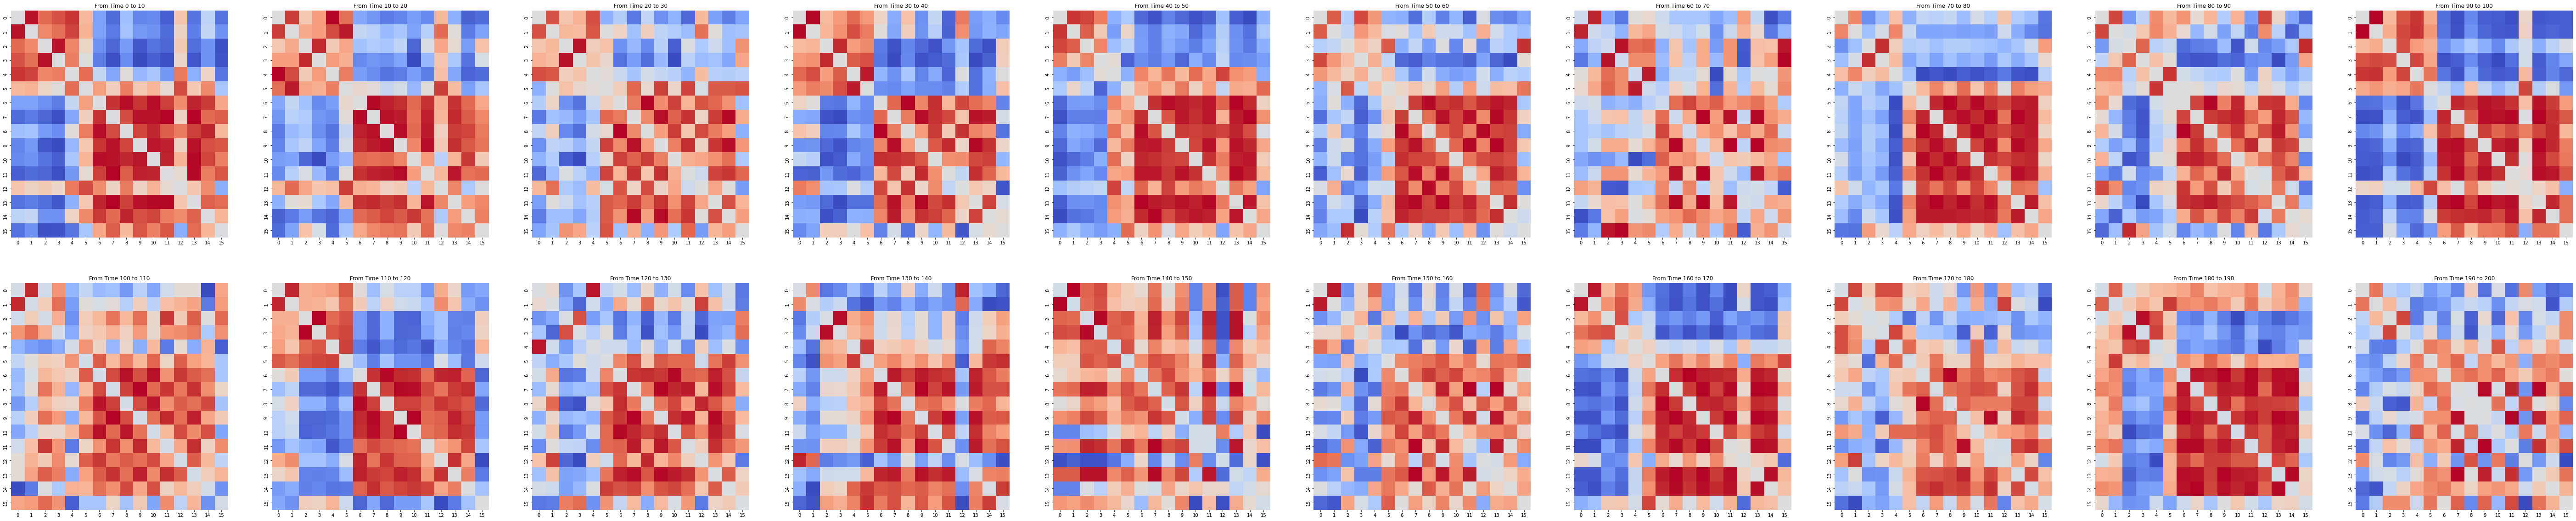

In [5]:
### dFC
import scipy.io
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np
import sys
sys.path.append('/home/yat-lok/workspace/Network-science-Toolbox/Python')
from TS2dFCstream import TS2dFCstream
from dFCstream2Trimers import dFCstream2Trimers
from dFCstream2MC import dFCstream2MC

mat = scipy.io.loadmat('/home/yat-lok/workspace/data4project/lateralization/ts_fmri/AD-TS/0306A/ROISignals_0306A.mat')
all = mat['ROISignals']

# filename = '/mnt/c/Users/wayne/Desktop/Functional TS/Region_Labels_90ROIs.txt'
# list_ = open(filename).read().split()
# region = list_[1::2]

# fc = np.ones((88,88))
# for i in range(88):
#     for j in range(88):
#         fc[i,j] = np.corrcoef(all[:,i], all[:,j])

df = pd.DataFrame(all, columns = range(16))
dFCstream = TS2dFCstream(df.to_numpy(), 10, None, '3D')

# fig = plt.figure(figsize=(20,100))
# #sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes)
# for i in range(dFCstream.shape[2]):
#     axes = fig.add_subplot(10,2,i+1)
#     axes.set_title(f"From Time {i*10} to {(i+1)*10}")
#     sns.heatmap(dFCstream[:,:,i], cmap = "coolwarm", annot=False, ax = axes)
#     #sns.heatmap(dFCstream[:,:,i], cmap = "coolwarm", annot=False, ax = axes, xticklabels=region[:89], yticklabels=region[:89])
# plt.show()
print(dFCstream.shape)

delve_time = []
for i in range(dFCstream.shape[2]-1):
    flat1 = np.triu(dFCstream[:,:,i]).flatten()[np.nonzero(np.triu(dFCstream[:,:,i]).flatten())]
    flat2 = np.triu(dFCstream[:,:,i+1]).flatten()[np.nonzero(np.triu(dFCstream[:,:,i+1]).flatten())]
    delve = 1 - np.corrcoef(flat1, flat2)[0,1]
    delve_time.append(delve)
delve_time.append(0)
fig = plt.figure(figsize=(100,dFCstream.shape[2]))
#sns.heatmap(pd.DataFrame(fc), cmap = "coolwarm", annot=False, ax = axes)
for i in range(dFCstream.shape[2]):
    axes = fig.add_subplot(2,10,i+1)
    axes.set_title(f"From Time {i*10} to {(i+1)*10}")
    print(f"The dFC speed between {i*10} sec and {(i+1)*10} sec is {delve_time[i]}")
    sns.heatmap(dFCstream[:,:,i], cmap = "coolwarm", annot=False, ax = axes, cbar=[])
    #sns.heatmap(dFCstream[:,:,i], cmap = "coolwarm", annot=False, ax = axes, xticklabels=region[:89], yticklabels=region[:89])
plt.show()